In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bc_data=load_breast_cancer()
x=bc_data.data
y=bc_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [4]:
log= LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)
y_pred = log.predict(x_test)

In [79]:
cm = confusion_matrix(y_test, y_pred, [0, 1])
#cm = normalize(cm, norm ='l1', axis=1 )
cm_df=pd.DataFrame(cm, columns=['predicted_malignant', 'predicted_benign'], index=['actual_malignant', 'actual_benign'])
cm_df

,predicted_malignant,predicted_benign
actual_malignant,39,3
actual_benign,2,70


In [71]:
class_report=classification_report(y_test, y_pred)

In [77]:
d=np.array([[0.95, 0.93, 0.94, 42],
 [0.96, 0.97, 0.97, 72],
 [0.96, 0.96, 0.96, 114]])
d_columns= ['precision', 'recall', 'f1-score', 'support']
d_index=['malignant', 'benign', 'average']

In [78]:
cr_df=pd.DataFrame(d, columns=d_columns, index=d_index)
cr_df

,precision,recall,f1-score,support
malignant,0.95,0.93,0.94,42.0
benign,0.96,0.97,0.97,72.0
average,0.96,0.96,0.96,114.0


# ROC Curve

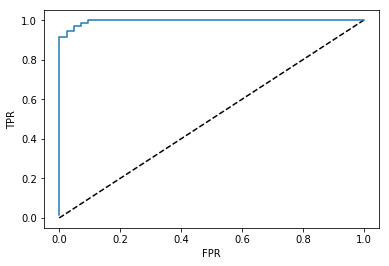

In [86]:
y_pred_prob=log.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1] , 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()